In [ ]:
#Assignment 1: 02805 Social graphs and interactions 
Group 65:
s226625 - Emma Rebner 

In [ ]:
#Assignment 1.1

In [ ]:
#===Exercises: Did you really read the text?===#

# 1) What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

ANSWER: 
Random networks fail as a model of real networks because they predict a narrow degree distribution, 
where all nodes have about the same number of links, whereas real networks show wide variability with both low-degree 
nodes and highly connected hubs.


In [ ]:
#===Exercises: Did you really read the text?===#

# 2) List the four regimes that characterize random networks as a function of.
    
ANSWER: 
The four regimes of random networks, as a function of the average degree ‹k›, are:
- Subcritical (‹k› < 1): The network is broken into many small clusters, with no giant component.
- Critical (‹k› = 1): A phase transition takes place; the largest cluster grows to about N^(2/3) but still represents only a small fraction of the network.
- Supercritical (‹k› > 1): A giant component forms and containing a finite share of the nodes, while smaller isolated clusters remain.
- Connected (‹k› ≳ lnN): The giant component includes almost all nodes, which makes the network fully connected


In [ ]:
#=== Exercises: Did you really read the text?===#

# 3) According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) 
# that the degree-dependent clustering  decreases as a function of  in real-world networks?

ANSWER: 
The problem is that random networks predict clustering to be the same for all nodes, 
regardless of degree, whereas in real networks clustering decreases as degree increases. 
The missing degree–clustering relationship means random networks cannot reproduce the hierarchical and community structures 
that exist in real systems. For example, studies of the Internet, science collaboration networks, and protein interaction networks show that high-degree nodes (hubs) have much lower clustering
than low-degree nodes, a pattern completely absent in random networks.


In [11]:
#===Exercises: WS edition===#

# 1) Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each with average degree = 4, and rewiring probablity p =0,01 and 1.
# Calculate the average shortest path length <d> for each one.

import networkx as nx
import numpy as np

# Parameters
N = 500
k = 4
ps = [0, 0.1, 1]

for p in ps:
  G = nx.watts_strogatz_graph(N, k, p)
  avg_shortest_path = nx.average_shortest_path_length(G)
  print(f"p={p}: <d> = {avg_shortest_path:.3f}")


p=0: <d> = 62.876
p=0.1: <d> = 7.912
p=1: <d> = 4.762


In [ ]:
#===Exercises: WS edition===#
# 2) Describe what happens to the network when p=1 .

ANSWER:  
For p=1,the network becomes fully randomized, and the paths are even shorter (⟨d⟩≈4.8).
When p=1, all edges in the Watts–Strogatz model are rewired randomly, which destroys the regular lattice structure and produces a network that behaves like an Erdős–Rényi random graph. 
In this regime, the average shortest path length is very small, scaling on the order of log(N), 
while the clustering coefficient is low because local connections are no longer preserved. 


In [14]:
#===Exercises: WS edition===#

# 3) Generate a lot of networks with different values of p.
# You will notice that paths are short when p=0 is close to one and they are long when p. 
# What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.

import networkx as nx
import numpy as np


# Parameters
N = 500
k = 4
p_values = [0, 0.01, 0.03, 0.05,0.6, 0.1, 0.2, 1]

results = []

for p in p_values:
    path_lengths = []
    for _ in range(20):  
        G = nx.watts_strogatz_graph(N, k, p)
        avg_len = nx.average_shortest_path_length(G)
        path_lengths.append(avg_len)
    mean_d = np.mean(path_lengths)
    results.append((p, mean_d))
    print(f"p={p}: <d> ≈ {mean_d:.3f}")

# ANSWER:
# The results show that the average shortest path length decreases very rapidly as p increases from zero. By p≈0.05–0.1,
# the distances are already close to those observed in the fully randomized case (p=1), where ⟨d⟩ stabilizes around 4–5. Larger values of 
# p such as 0.6 or 1 do not change the distance significantly, since the network has reached the random-graph limit (⟨d⟩∼logN).

p=0: <d> ≈ 62.876
p=0.01: <d> ≈ 24.141
p=0.03: <d> ≈ 13.123
p=0.05: <d> ≈ 10.189
p=0.6: <d> ≈ 4.872
p=0.1: <d> ≈ 7.657
p=0.2: <d> ≈ 6.106
p=1: <d> ≈ 4.762


p=0: mean <d> ≈ 62.876, std ≈ 0.000
p=0.01: mean <d> ≈ 24.355, std ≈ 4.404
p=0.03: mean <d> ≈ 12.888, std ≈ 1.476
p=0.05: mean <d> ≈ 10.121, std ≈ 0.764
p=0.1: mean <d> ≈ 7.677, std ≈ 0.228
p=0.2: mean <d> ≈ 6.121, std ≈ 0.119


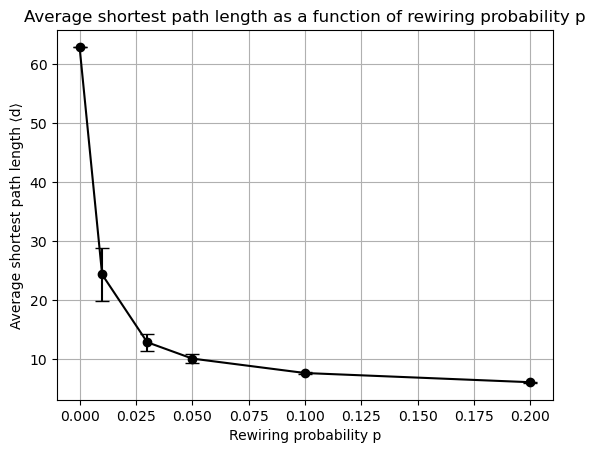

In [19]:
#===Exercises: WS edition===#
# 4) Generate 50 networks with N=500 nodes and average degree ⟨k⟩=4. For each value of p∈{0,0.01,0.03,0.05,0.1,0.2}, 
# Calculate the average of as well as the standard deviation over the 50 networks, to create a plot that shows how the
# path length decreases very quickly with only a little fraction of re-wiring. 

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 500
k = 4
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
num_networks = 50

results = []

for p in p_values:
    d_values = []
    for _ in range(num_networks):
        G = nx.watts_strogatz_graph(N, k, p)
        avg_d = nx.average_shortest_path_length(G)
        d_values.append(avg_d)
    mean_d = np.mean(d_values)
    std_d = np.std(d_values)
    results.append((p, mean_d, std_d))
    print(f"p={p}: mean <d> ≈ {mean_d:.3f}, std ≈ {std_d:.3f}")

# Extract results
p_list = [r[0] for r in results]
mean_list = [r[1] for r in results]
std_list = [r[2] for r in results]

# Plot with errorbar
plt.errorbar(p_list, mean_list, yerr=std_list, fmt='o-', capsize=5, color='black', ecolor='black', markerfacecolor='black')
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length ⟨d⟩")
plt.title("Average shortest path length as a function of rewiring probability p")
plt.grid(True)
plt.show()


In [ ]:
#===Exercises: WS edition===#
# 5) Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

The plot shows the average shortest path length ⟨d⟩ as a function of the rewiring probability p in the Watts–Strogatz model with 
N=500 nodes and average degree ⟨k⟩=4. For each value of p∈{0,0.01,0.03,0.05,0.1,0.2}, 50 independent network realizations were generated. 
The black circles indicate the mean value of ⟨d⟩, while the vertical error bars represent the standard deviation across the 50 networks.
The results show that in the regular lattice (p=0) the average path length is very large, but it decreases sharply as soon as a small fraction of edges are rewired 
(p=0.01–0.05). Beyond p≈0.1. The average path length is already close to the random-graph limit, and further rewiring does not reduce distances significantly.
This illustrates the small-world effect; only a small amount of randomness is required to drastically shorten global distances while maintaining some local clustering.

In [ ]:
#Assignment 1.2
# Part 2